# Using APIs and Intro to Machine Learning Project
#### Derek Zheng and Shreyas Iyer

## Using an API

In [1]:
# Importing necessary libraries
import urllib
import requests
import time

## Making an API

In [2]:
# Necessary imports
import random
from flask import Flask, request
import random

## Data Science

In [3]:
# Necessary imports:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

### K Means Clustering (example)

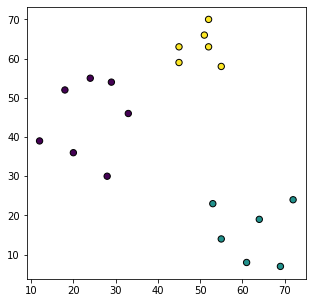

In [4]:
# Creating a pandas dataframe
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# Alternatively, use random datasets
"""
rands1 = [random.randint(0,100) for i in range(100)]
rands2 = [random.randint(0,100) for i in range(100)]
df = pd.DataFrame({
    'x': rands1,
    'y': rands2
})
"""

# Using the sklearn KMeans algorithm to group data
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Accessing the central points of each group 
centroids = kmeans.cluster_centers_

# Accessing the labels of each point
labels = kmeans.labels_


# Plotting the results below
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'], c=labels.astype(np.float), edgecolor='k', s=40)

    



### K Nearest Neighbors

In [9]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + '/indian_liver_patient.csv')

# Adding an Id tag to the dataframe
dataset['Id'] = range(583)

# Ways to visualize the data:
rows, cols = dataset.shape


# Check how many of each species we have
dataset.groupby('Gender').size()

# splitting up the labels and the values for each species:
feature_columns = ['Age', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase','Total_Protiens']
X = dataset[feature_columns].values
Y = dataset['Gender'].values

le = LabelEncoder()
Y = le.fit_transform(Y)

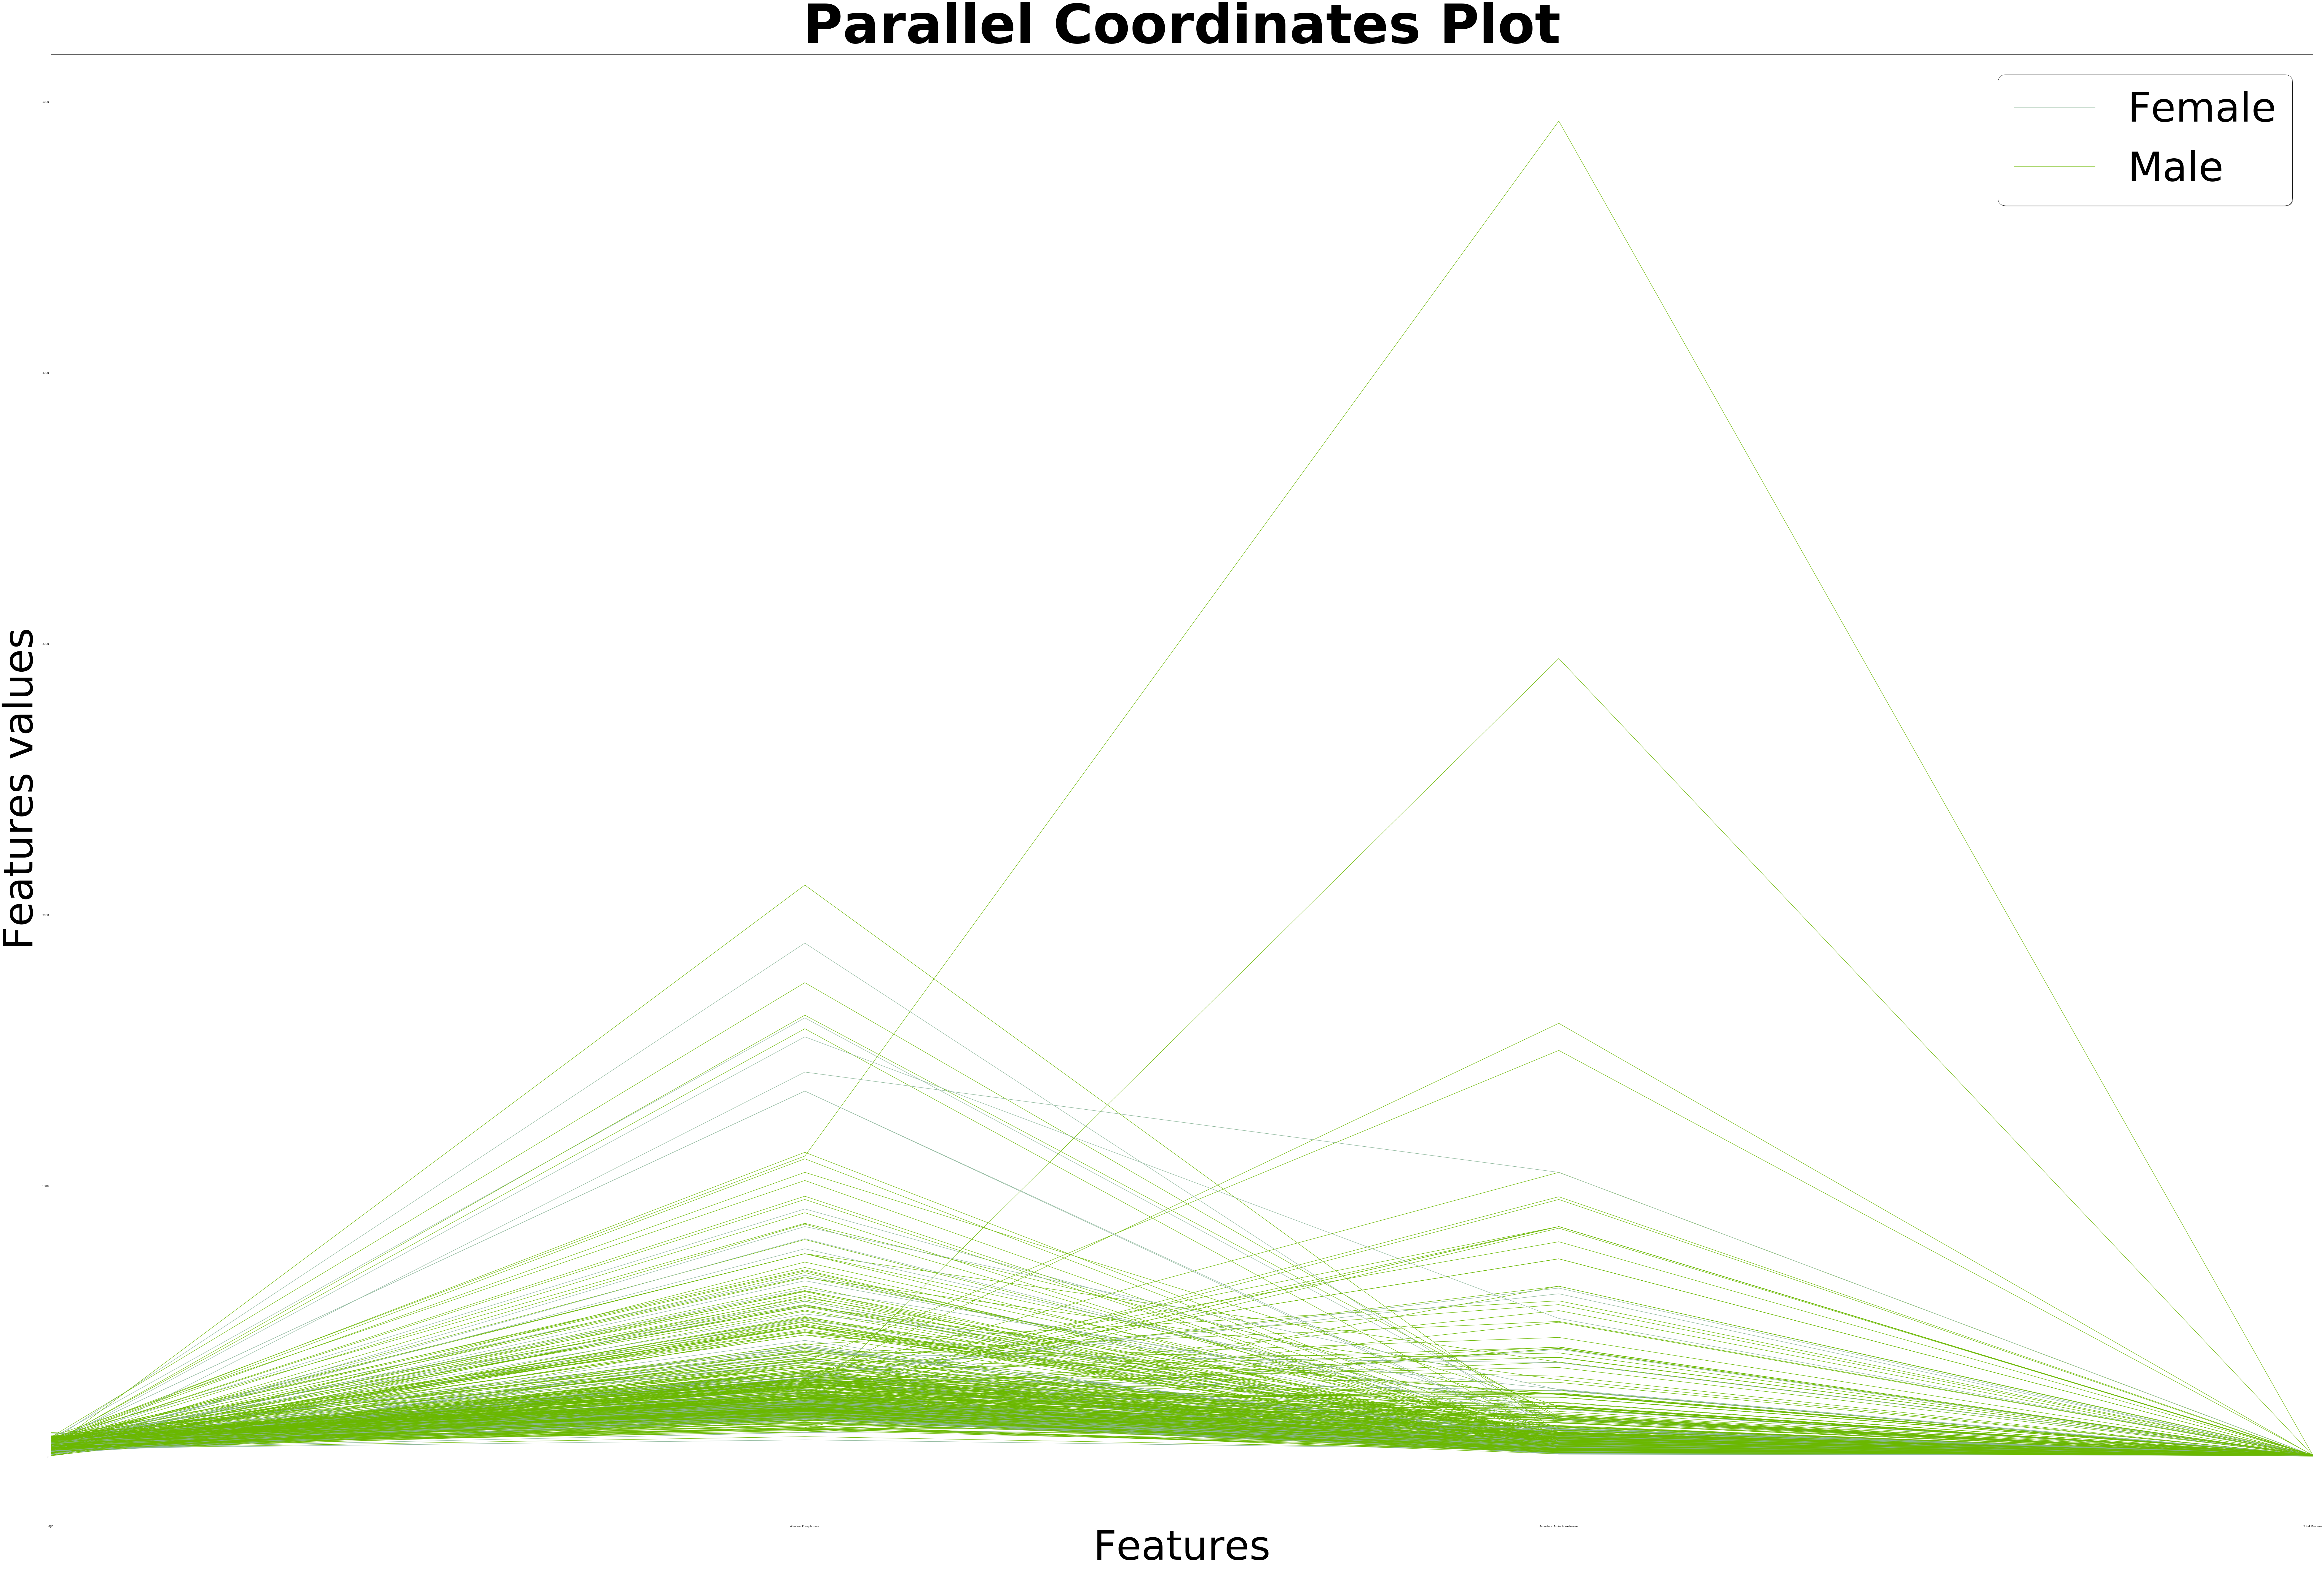

In [11]:
# Data Visualization:
plt.figure(figsize=(150,100))
parallel_coordinates(dataset.drop("Id", axis=1), "Gender")
plt.title('Parallel Coordinates Plot', fontsize=200, fontweight='bold')
plt.xlabel('Features', fontsize=150)
plt.ylabel('Features values', fontsize=150)
plt.legend(loc=1, prop={'size': 150}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Training the model:

In [12]:
# Splitting into training and test datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Test the model

In [13]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')
cm = confusion_matrix(Y_test, Y_pred)
cm

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
Accuracy of model: 76.03 %.


array([[ 14,  46],
       [ 24, 208]])

### Testing out different k values

NameError: name 'k_list' is not defined

<Figure size 432x288 with 0 Axes>

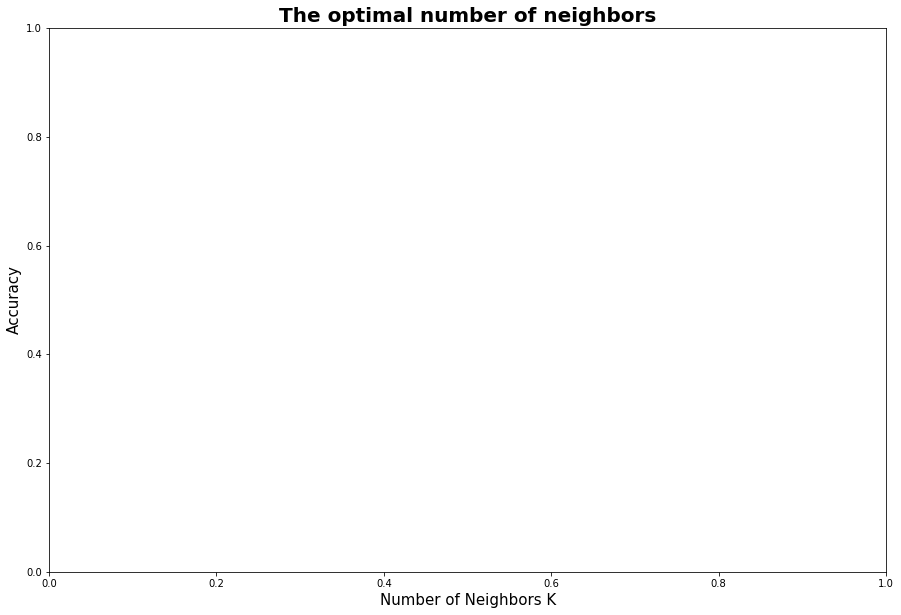

In [18]:
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

## Making an iris-classifier API

In [ ]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to indian patient gender 
    classes = ["Female", "Male"]
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ["sHeight", "sWidth", "pHeight", "pWidth"]]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?sHeight=NUM&sWidth=NUM&pHeight=NUM&sHeight=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run()

# try 127.0.0.1:5000?sHeight=5.2&sWidth=4.6&pHeight=4.2&sHeight=7.8
    

## Citations

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}

#### Inspiration for this project came from a similar instructive project created by Johnny Berman and Jeffery He that can be found here: github.com/JohnnyBerman/HCS-Data-Science-Bootcamp

#### Code for KNN iris project adapted from SkalskiP. Orginial found here: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

#### Iris dataset: https://www.kaggle.com/uciml/iris